<a href="https://colab.research.google.com/github/ucfilho/marquesgabi_paper_fev_2021/blob/main/Qualificacao/Comparative_ANNs/PSD_histogram_CNN_B_r_squared_jun_23_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import zipfile
#import random
from random import randint
from PIL import Image
import re
from sklearn.model_selection import train_test_split
#import scikit-image
import skimage
import sklearn
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from sklearn.metrics import r2_score
from google.colab import files

In [2]:
!pip install mahotas

In [3]:
import mahotas.features.texture as mht
import mahotas.features

In [4]:
!git clone https://github.com/ucfilho/marquesgabi_fev_2020 #clonar do Github
%cd marquesgabi_fev_2020
import Go2BlackWhite
import Go2Mahotas

fatal: destination path 'marquesgabi_fev_2020' already exists and is not an empty directory.
/content/marquesgabi_fev_2020


In [5]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado

Transfere='Fotos_Grandes_3cdAmostra.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

fatal: destination path 'Doutorado' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/Doutorado


In [6]:
Size=1200 # tamanho da foto
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size) #Pegamos a primeira foto Grande
img=ww[4] 
# this is the big image we want to segment 
# ww[0], change it if you want to segment another picture

In [7]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

fatal: destination path 'MarquesGabi_Routines' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines


In [8]:
from segment_filter_not_conclude import Segmenta  # got image provided segmented

In [9]:
df=Segmenta(img)
Img_Size = 28

In [10]:
print(df)

    Width           0           1  ...         781         782         783
0     139  126.105331  122.764290  ...  154.385895  156.548416  155.888611
1     111  139.434143  143.914444  ...    1.081649    1.993264    1.061359
2     139    1.039128    0.046323  ...   51.998341   59.529060   62.908493
3     150  149.484970  149.852615  ...    0.797333    0.154844    1.221511
4     125  134.426880  145.701004  ...    1.066176    1.906880    1.023296
5     123  146.642349  146.999405  ...  197.372864  201.677444  200.553925
6     129  124.999512  115.061646  ...  176.193375  174.143326  173.152023
7     102  107.123810  113.821999  ...  117.173409  101.717819   85.078827
8     103  160.928360  137.314819  ...  131.743332  132.550369  133.046936
9     100  105.643204  106.697594  ...    0.067200    0.971200    1.638400
10    167  118.047157  122.942703  ...  115.248451  114.527008  111.432831
11    168  142.833328  167.305557  ...  124.805557  118.944443  118.027779
12    144   96.564049   9

In [11]:
'''
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines
# filename = 'model_ANN.pkl'
filename = 'model_ANN_new.pkl'
model = joblib.load(filename)
'''

"\n!git clone https://github.com/ucfilho/MarquesGabi_Routines\n%cd MarquesGabi_Routines\n# filename = 'model_ANN.pkl'\nfilename = 'model_ANN_new.pkl'\nmodel = joblib.load(filename)\n"

In [12]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

fatal: destination path 'MarquesGabi_Routines' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines


In [13]:
# leitura dos dados
df=pd.read_excel("FotosTreinoRede.xlsx")
y = df['y']
df.drop(['Unnamed: 0','y'], axis='columns', inplace=True)

In [14]:
X =np.array(df.copy())/255.0 


X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=42)

In [15]:
# helper
def ynindicator(Y):
  N = len(Y)
  K = len(set(Y))
  I = np.zeros((N, K))
  I[np.arange(N), Y] = 1
  return I

def yback(Y_test):
  nrow, ncol = Y_test.shape
  y_class = np.zeros(nrow,dtype=int)
  y_resp = Y_test
  for k in range(nrow):
    for kk in range(K):
      if(y_resp[k,kk] == 1):
        y_class[k] = kk
  Y_test = y_class.copy()
  return Y_test

X_train = np.array(X_train)
Y_train = np.array(Y_train)
K = len(set(Y_train))

X_train = X_train.reshape(-1, Img_Size, Img_Size, 1) / 255.0
Y_train = Y_train.astype(np.int32)
Y_train = ynindicator(Y_train)

X_test = np.array(X_test )
Y_test = np.array(Y_test)
X_test = X_test.reshape(-1, Img_Size, Img_Size, 1) / 255.0
Y_test = Y_test.astype(np.int32)
Y_test = ynindicator(Y_test)

# the model will be a sequence of layers

Description = '3 layers of Convolution: 32, 64, 128 '
N1 = 200
N2 = 10

# make the CNN
model = Sequential()
model.add(Conv2D(input_shape=(Img_Size, Img_Size, 1), filters=32, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=64, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=128, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(units=N1))
model.add(Dropout(0.2))
model.add(Dense(units=N2))
model.add(Activation('relu'))
#model.add(Dropout(0.2))
model.add(Dense(units=K))
model.add(Activation('softmax'))


# list of losses: https://keras.io/losses/
# list of optimizers: https://keras.io/optimizers/
# list of metrics: https://keras.io/metrics/
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [16]:

# training the model
r = model.fit(X_train, Y_train, validation_data=(X_test,Y_test), 
              epochs=200, batch_size=32)

Epoch 1/200
11/11 [==============================] - 2s 77ms/step - loss: 0.6616 - accuracy: 0.6356 - val_loss: 0.6933 - val_accuracy: 0.4898
Epoch 2/200
11/11 [==============================] - 1s 53ms/step - loss: 0.4035 - accuracy: 0.8163 - val_loss: 0.6930 - val_accuracy: 0.5102
Epoch 3/200
11/11 [==============================] - 1s 54ms/step - loss: 0.2579 - accuracy: 0.8892 - val_loss: 0.6929 - val_accuracy: 0.5102
Epoch 4/200
11/11 [==============================] - 1s 53ms/step - loss: 0.1489 - accuracy: 0.9388 - val_loss: 0.6929 - val_accuracy: 0.5102
Epoch 5/200
11/11 [==============================] - 1s 53ms/step - loss: 0.0762 - accuracy: 0.9767 - val_loss: 0.6928 - val_accuracy: 0.7347
Epoch 6/200
11/11 [==============================] - 1s 52ms/step - loss: 0.0473 - accuracy: 0.9767 - val_loss: 0.6930 - val_accuracy: 0.4898
Epoch 7/200
11/11 [==============================] - 1s 52ms/step - loss: 0.0316 - accuracy: 0.9913 - val_loss: 0.6935 - val_accuracy: 0.4898
Epoch 

In [17]:
Y_test = yback(Y_test)

In [18]:
#pred_test= model.predict_classes(X_test)
pred_test= np.argmax(model.predict(X_test), axis=-1)

data = {'y_true': Y_test,'y_predict': pred_test}  # este dado esta no formato de dicionario

df = pd.DataFrame(data, columns=['y_true','y_predict'])


confusion_matrix = pd.crosstab(df['y_true'], df['y_predict'], rownames=['Actual'], colnames=['Predict'])
print(confusion_matrix)

y_true = df['y_true']
y_pred = df['y_predict']

  
METRICS=sklearn.metrics.classification_report(y_true, y_pred)

Predict   0   1
Actual         
0        69   3
1         1  74


In [19]:
pred_test

array([1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1])

In [20]:
cont = 0; num =25
img_graos = []
Width_new = []
img=ww[0] 
while( cont < num):
  df=Segmenta(img)
  df_ann =df.copy()
  Width = df['Width']
  del df_ann['Width']
  result = np.array(df_ann)
  result = result.reshape(-1, Img_Size, Img_Size, 1) / 255.0
  #prediction = model.predict_classes(result)
  prediction= np.argmax(model.predict(result), axis=-1)
  loc_grao =[];k=0
  for i in prediction:
    if( i == 0):
      img_graos.append(df.iloc[k,:])
      Width_new.append(Width.iloc[k])
      cont = cont + 1
    k = k +1
img_graos = pd.DataFrame(img_graos)
print(img_graos)

    Width           0           1  ...         781         782         783
0   152.0   50.378117   51.056786  ...  157.300552  108.574799   70.511772
3   151.0   57.209335   50.073242  ...  112.237625  106.178108   81.611908
4   120.0   87.367783   44.252228  ...    0.511111    0.000000    0.000000
5   113.0   54.331192   55.017700  ...   88.006737   85.108070   72.290154
8   153.0   56.294254   53.946178  ...   38.478706   33.101116   19.170235
9   158.0   47.477806   44.613201  ...   64.979492   73.500725   80.170486
11  137.0  113.008957  111.042938  ...   34.074966   26.182323   16.610260
13  178.0  113.346802  149.910889  ...   88.080048   90.381523   93.937141
14  199.0  101.856262   98.023331  ...    3.135047    1.654504    1.110073
17  146.0   54.607803   53.600113  ...   10.720773    3.477388    0.054232
19  145.0   37.973267   54.564281  ...   94.842667   95.878326   96.706879
20  118.0   45.513359   45.783970  ...   71.779663   62.908646   45.383797
22  142.0   51.672485   5

In [21]:
Width=np.array(Width_new)

In [22]:
!git clone https://github.com/ucfilho/marquesgabi_paper_fev_2021
%cd marquesgabi_paper_fev_2021

from Get_PSDArea_New import PSDArea
from histogram_fev_2021 import PSD
from GetBetterSegm import GetBetter

Cloning into 'marquesgabi_paper_fev_2021'...
remote: Enumerating objects: 671, done.
remote: Counting objects: 100% (432/432), done.
remote: Compressing objects: 100% (430/430), done.
remote: Total 671 (delta 270), reused 0 (delta 0), pack-reused 239
Receiving objects: 100% (671/671), 5.50 MiB | 13.67 MiB/s, done.
Resolving deltas: 100% (407/407), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021


In [23]:
!git clone https://github.com/ucfilho/marquesgabi_out_2020
%cd marquesgabi_out_2020
PSD_imageJ = 'Areas_ImageJ.csv'
PSD_new = pd.read_csv(PSD_imageJ)
print(PSD_new.head(3))

Cloning into 'marquesgabi_out_2020'...
remote: Enumerating objects: 146, done.
remote: Counting objects: 100% (146/146), done.
remote: Compressing objects: 100% (142/142), done.
remote: Total 146 (delta 75), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (146/146), 1.00 MiB | 16.57 MiB/s, done.
Resolving deltas: 100% (75/75), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/marquesgabi_out_2020
   Juntas   Area
0       1  2.001
1       2  0.820
2       3  1.270


In [24]:
Area_All, Diameter_All=PSDArea(img_graos) 

In [25]:
img_graos.head()

,Width,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,152.0,50.378117,51.056786,53.599720,54.993073,54.824093,43.374653,89.959129,119.245148,130.838654,139.754852,136.808853,132.174515,131.139893,131.774231,133.163437,138.943222,130.218826,129.759705,130.369812,135.012466,143.615646,167.376740,181.464676,192.331024,216.565109,159.371887,76.616341,99.650970,49.146816,50.198753,51.954292,51.669670,48.443909,35.801937,76.663437,117.980606,129.882263,141.573395,139.981995,...,152.447372,151.438354,152.367035,155.186966,155.751389,152.950836,150.298477,142.874649,127.283241,100.755539,66.259697,55.333099,74.232681,72.773544,68.925201,59.313019,55.855270,57.656509,57.484070,58.023544,63.713989,105.945290,134.265228,138.015228,134.078934,134.823410,142.497925,146.860107,149.909973,154.552628,158.274231,166.363556,171.117722,173.623260,172.274933,169.632965,164.477844,157.300552,108.574799,70.511772
3,151.0,57.209335,50.073242,55.100433,61.088593,66.445244,69.921417,69.333801,64.871719,62.102058,61.686199,62.175392,61.442703,60.397530,60.012280,57.375595,50.074253,36.683922,26.186396,24.831192,28.058332,34.312706,53.216618,65.009567,68.646156,71.225609,72.482918,71.763748,71.775322,58.218502,48.581818,53.690239,59.333145,63.542301,67.761765,68.353409,67.149948,62.890793,61.357094,60.068024,...,65.222885,63.748131,64.395996,64.224686,68.322662,71.277534,87.316132,104.748436,110.894257,107.621773,93.474632,76.483879,104.946716,108.931549,110.039391,109.335297,99.604591,116.275513,128.538391,138.972244,154.279327,166.937195,176.176758,100.427361,28.915356,53.549980,57.775848,60.353367,63.220779,62.988071,62.173279,65.856018,73.982498,90.779922,102.481873,108.312592,112.868645,112.237625,106.178108,81.611908
4,120.0,87.367783,44.252228,42.998890,43.155552,39.003334,37.627777,31.755554,24.042223,24.995556,25.740004,25.938887,27.435556,32.426666,37.054443,36.705555,36.101112,31.015556,17.106667,6.807778,5.871111,4.245555,3.800000,4.327778,3.558889,1.366667,0.230000,0.008889,0.000000,69.915558,41.303337,39.844444,39.778893,37.957779,38.945557,36.000004,30.776669,30.654446,30.538887,32.293335,...,10.851111,13.977777,16.779999,16.561110,11.821112,5.414444,3.492223,1.880000,0.687778,0.355556,0.000000,0.000000,55.023335,55.428886,54.921108,54.684444,51.985558,41.206665,22.921110,14.798889,13.552221,15.221110,18.818890,21.572224,23.287779,25.624445,26.713335,29.350000,30.437778,30.443335,30.677778,30.381111,28.037777,17.859999,4.543334,1.575556,0.733333,0.511111,0.000000,0.000000
5,113.0,54.331192,55.017700,53.214897,52.273712,50.721905,47.942986,44.933353,43.029049,44.819176,49.170338,50.883236,51.591198,51.157883,54.688305,57.339882,57.780952,58.461903,60.181217,59.929203,56.568718,42.936485,13.303782,7.527840,6.555643,11.673115,34.487747,58.098282,72.280602,53.657372,55.231030,55.179661,53.752918,50.562927,48.674286,45.342159,43.821602,45.859032,49.336521,50.788944,...,111.266663,125.982460,110.725815,74.573418,80.093201,84.546646,88.125771,87.432053,87.222015,85.674995,81.925522,60.787766,25.679222,16.720181,10.011120,8.006108,7.443026,8.785966,10.615630,15.423056,43.353199,61.787842,70.092964,77.060143,74.133293,84.569504,102.229774,97.798416,148.469269,143.690353,123.058655,73.164536,79.665916,81.959122,83.609367,86.664421,87.334946,88.006737,85.108070,72.290154
8,153.0,56.294254,53.946178,55.461021,54.806232,54.779617,54.067585,54.869755,50.098427,36.995815,19.157206,10.062541,17.512068,29.806700,35.252895,37.841393,38.201164,40.029861,38.341709,39.785080,38.720108,35.476227,34.785980,32.567646,31.863300,27.658125,25.083044,15.023539,1.990517,61.393906,58.421467,60.737030,63.169937,61.555901,60.859413,60.139008,51.613911,30.741552,11.024693,7.062754,...,31.890257,32.282497,32.951305,33.377209,34.551071,36.143024,36.05

In [26]:
Area = np.array(PSD_new['Area'])
diam_teste = []
for A in Area:
  diam_teste.append((4*A/np.pi)**0.5) 

Diam1 = [ (4*A/np.pi)**0.5 for A in Area]

In [27]:
X.shape

(490, 784)

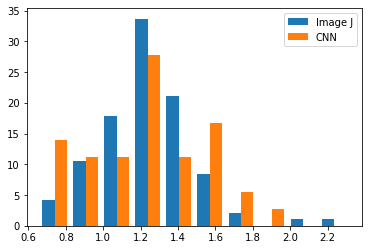

In [28]:
 wt1 = np.ones(len(Diam1)) / len(Diam1)*100
 wt2 = np.ones(len(Diameter_All)) / len(Diameter_All)*100
 X = pd.DataFrame([Diam1,Diameter_All])
 wts = pd.DataFrame([wt1,wt2])
plt.hist(X,weights=wts)
plt.legend(['Image J','CNN'])

(array([[0.04210526, 0.14736842, 0.32631579, 0.66315789, 0.87368421,
         0.95789474, 0.97894737, 0.97894737, 0.98947368, 1.        ],
        [0.13888889, 0.25      , 0.36111111, 0.63888889, 0.75      ,
         0.91666667, 0.97222222, 1.        , 1.        , 1.        ]]),
 array([0.65708494, 0.82312037, 0.98915579, 1.15519122, 1.32122664,
        1.48726207, 1.65329749, 1.81933292, 1.98536834, 2.15140377,
        2.31743919]),
 <a list of 2 Lists of Patches objects>)

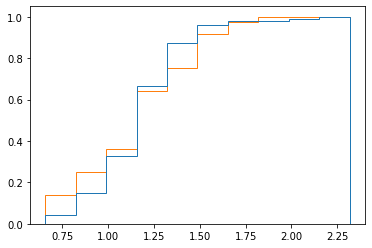

In [29]:
# plt.hist(x, bins=bins, density=True, histtype='step', cumulative=-1,label='Reversed emp.')
plt.hist(X, density=True, histtype='step', cumulative=True,label='Reversed emp.')

r_squared = 0.9698907750823322


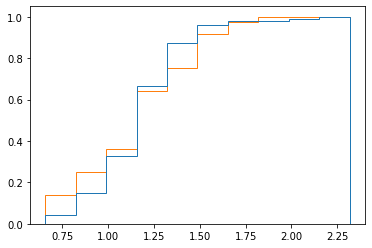

In [30]:
Obj = plt.hist(X, density=True, histtype='step', cumulative=True,label='Reversed emp.')
Y1, Y2 = Obj[0]
Rsquared = r2_score(Y1, Y2)
print('r_squared =',Rsquared)

In [31]:
acc_train = r.history['accuracy'][-1]
acc_test = r.history['val_accuracy'][-1]
loss_train = r.history['loss'][-1]
loss_test = r.history['val_loss'][-1]

In [32]:
df = pd.DataFrame({'N1':N1, 'N2':N2,'R^2':Rsquared,
                   'acc train':acc_train,'acc test':acc_test,
                   'loss train':loss_train,'loss test':loss_test,
                   'Details':Description},
                  index= [0])
Arq = "output.xlsx"
df.to_excel(Arq)
files.download(Arq)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [33]:
df

,N1,N2,R^2,acc train,acc test,loss train,loss test,Details
0,200,10,0.969891,1.0,0.972789,0.000004,0.213473,"3 layers of Convolution: 32, 64, 128"


<a list of 2 Lists of Patches objects>
[0.65708494 0.82312037 0.98915579 1.15519122 1.32122664 1.48726207
 1.65329749 1.81933292 1.98536834 2.15140377 2.31743919]
[[ 4.21052632 10.52631579 17.89473684 33.68421053 21.05263158  8.42105263
   2.10526316  0.          1.05263158  1.05263158]
 [13.88888889 11.11111111 11.11111111 27.77777778 11.11111111 16.66666667
   5.55555556  2.77777778  0.          0.        ]]


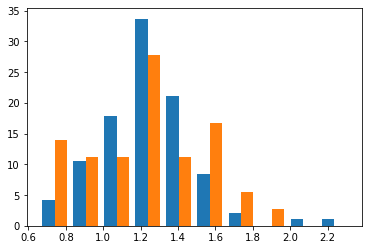

In [34]:
counts, bins, bars = plt.hist(X,weights=wts)
print(bars)
print(bins)
print(counts)

In [35]:
print(counts.sum())

200.00000000000006


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


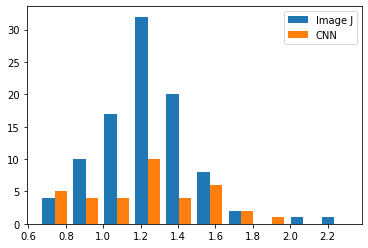

In [36]:

plt.hist([Diam1,Diameter_All])
plt.legend(['Image J','CNN'])


In [37]:
[Diam1,Diameter_All]

[[1.59616801403081,
  1.0217907939900581,
  1.2716187407449044,
  1.104429030701514,
  1.2163487785097904,
  1.6013445735058454,
  1.1715597420637607,
  1.2534662333717612,
  1.2676073151634049,
  1.309600575274104,
  1.292966945531582,
  1.7658322811231006,
  1.3564037533648712,
  1.2407040781688483,
  2.130217298173151,
  1.4228319915327,
  1.0651086490865755,
  1.3008210311003705,
  1.336545951796433,
  0.8927754224911278,
  1.4494292838262302,
  1.4052738287907582,
  1.6421697097891788,
  1.2329833804288621,
  1.19042665178928,
  1.1682948223612457,
  1.1518314137121108,
  0.9607802401865855,
  2.317439190074449,
  1.0591147430338594,
  1.4308630919602832,
  0.7535680705496237,
  0.8608283307581511,
  1.2776122636975893,
  1.3745862957220916,
  1.259546137598783,
  1.2978813187979172,
  1.2412170838050638,
  1.6009469708743893,
  1.3149369953539032,
  1.417901703622935,
  1.2478669653497139,
  1.1055812783082735,
  0.9561307405997607,
  0.9487783503683882,
  1.1238565871041026,
  1